# Estimativa de preços de imóveis na California

## Adquirir o dataset

Já está pronto no `scikit-learn`:

In [1]:
from sklearn.datasets import fetch_california_housing

california = fetch_california_housing()

In [6]:
print(california['DESCR'])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [7]:
X = california['data']
y = california['target']

In [8]:
X.shape, y.shape

((20640, 8), (20640,))

In [10]:
import pandas as pd

In [11]:
df = pd.DataFrame(X, columns=california['feature_names'])

In [14]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MedInc,20640.0,3.870671,1.899822,0.499900,2.563400,3.534800,4.743250,15.000100
HouseAge,20640.0,28.639486,12.585558,1.000000,18.000000,29.000000,37.000000,52.000000
AveRooms,20640.0,5.429000,2.474173,0.846154,4.440716,5.229129,6.052381,141.909091
AveBedrms,20640.0,1.096675,0.473911,0.333333,1.006079,1.048780,1.099526,34.066667
Population,20640.0,1425.476744,1132.462122,3.000000,787.000000,1166.000000,1725.000000,35682.000000
AveOccup,20640.0,3.070655,10.386050,0.692308,2.429741,2.818116,3.282261,1243.333333
Latitude,20640.0,35.631861,2.135952,32.540000,33.930000,34.260000,37.710000,41.950000
Longitude,20640.0,-119.569704,2.003532,-124.350000,-121.800000,-118.490000,-118.010000,-114.310000


In [15]:
ser_y = pd.Series(y)

In [16]:
ser_y.describe()

count    20640.000000
mean         2.068558
std          1.153956
min          0.149990
25%          1.196000
50%          1.797000
75%          2.647250
max          5.000010
dtype: float64

In [17]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [20]:
df[df['AveOccup'] > 500]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
3364,5.5179,36.0,5.142857,1.142857,4198.0,599.714286,40.41,-120.51
16669,4.2639,46.0,9.076923,1.307692,6532.0,502.461538,35.32,-120.70
19006,10.2264,45.0,3.166667,0.833333,7460.0,1243.333333,38.32,-121.98


Ocupação alta == prisão

In [21]:
df[df['AveRooms'] > 100]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
1914,1.875,33.0,141.909091,25.636364,30.0,2.727273,38.91,-120.10
1979,4.625,34.0,132.533333,34.066667,36.0,2.400000,38.80,-120.08


Parecem ser hoteis

## Separação treino-teste

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
)


In [24]:
X.shape, X_train.shape, X_test.shape

((20640, 8), (16512, 8), (4128, 8))

In [25]:
y.shape, y_train.shape, y_test.shape

((20640,), (16512,), (4128,))

In [26]:
df_train = pd.DataFrame(X_train, columns=california['feature_names'])

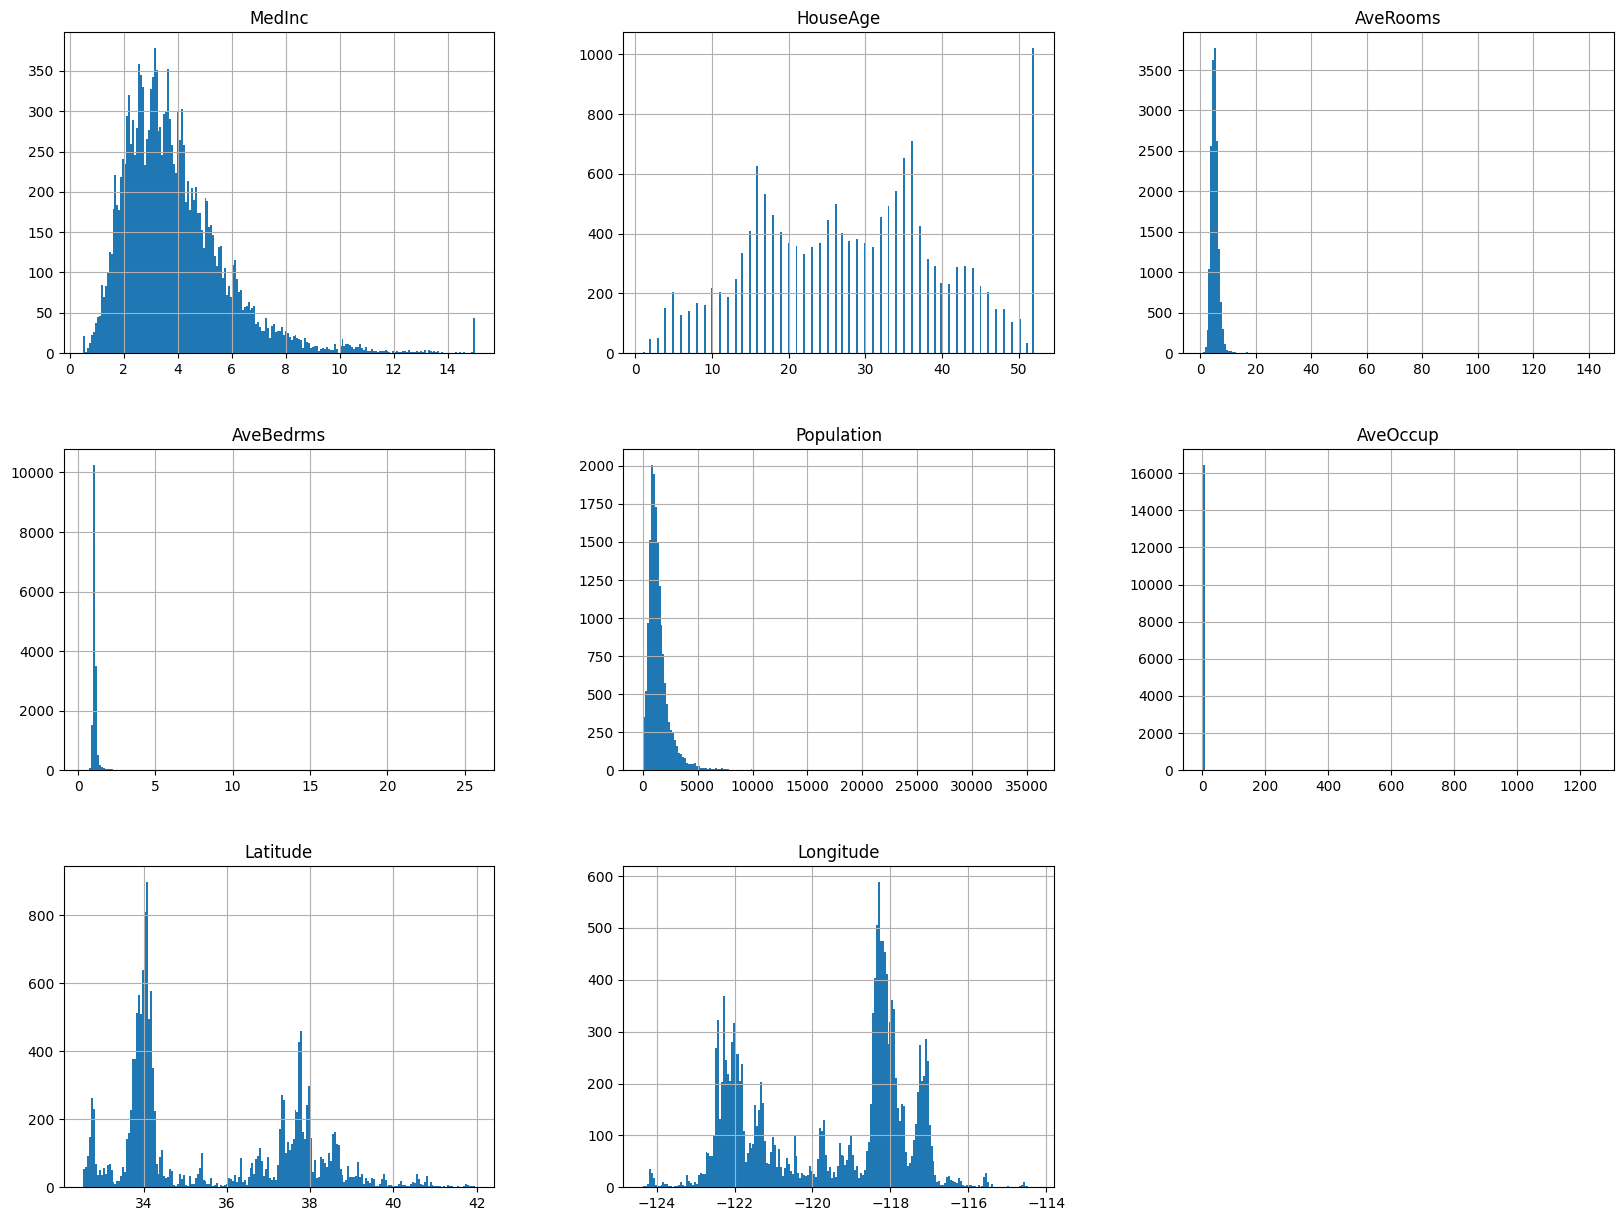

In [30]:
df_train.hist(bins=200, figsize=(20, 15));

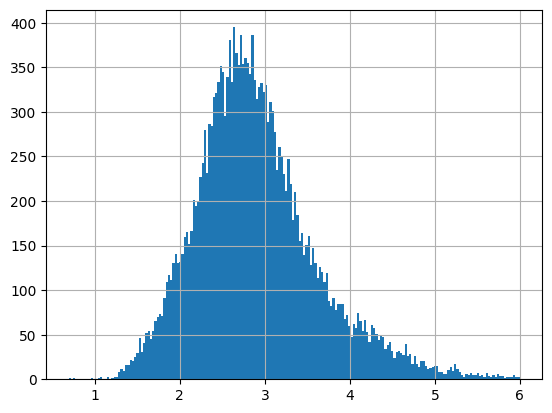

In [35]:
df[df['AveOccup'] < 6]['AveOccup'].hist(bins=200);

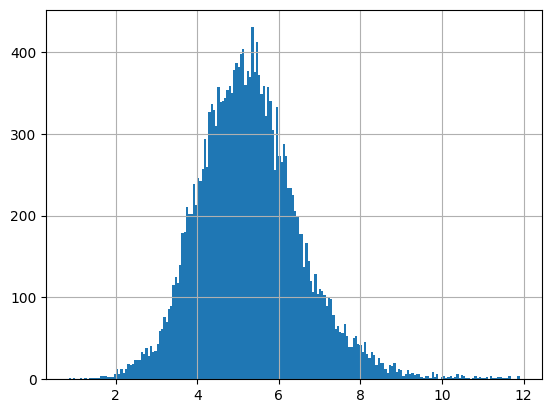

In [40]:
df[df['AveRooms'] < 12]['AveRooms'].hist(bins=200);

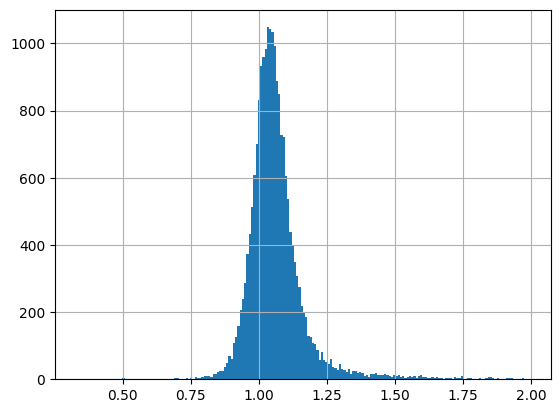

In [37]:
df[df['AveBedrms'] < 2]['AveBedrms'].hist(bins=200);

In [43]:
# Filtrar os dados
def filtra_dados(X, y, columns):
    df = pd.DataFrame(X, columns=columns)
    df['target'] = y
    df = df[
        (df['AveOccup'] < 6) &
        (df['AveRooms'] < 12) &
        (df['AveBedrms'] < 2) &
        (df['MedInc'] < 15) &
        (df['HouseAge'] < 52)   
    ]
    X_filt = df[columns].values
    y_filt = df['target'].values
    return X_filt, y_filt

In [44]:
X_train_filt, y_train_filt = filtra_dados(X_train, y_train, california['feature_names'])
X_test_filt, y_test_filt = filtra_dados(X_test, y_test, california['feature_names'])

In [68]:
ser_y = pd.Series(y_train_filt)

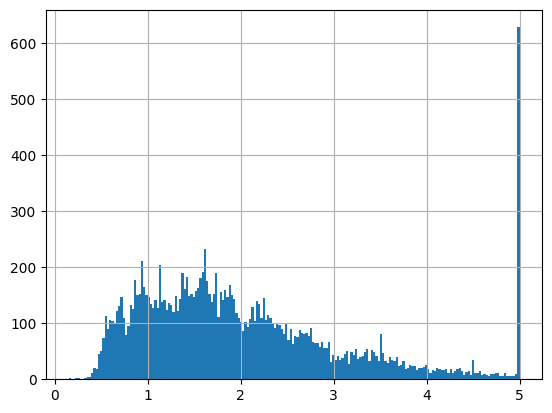

In [70]:
ser_y.hist(bins=200);

## Feature engineering

In [45]:
df = pd.DataFrame(X_train_filt, columns=california['feature_names'])

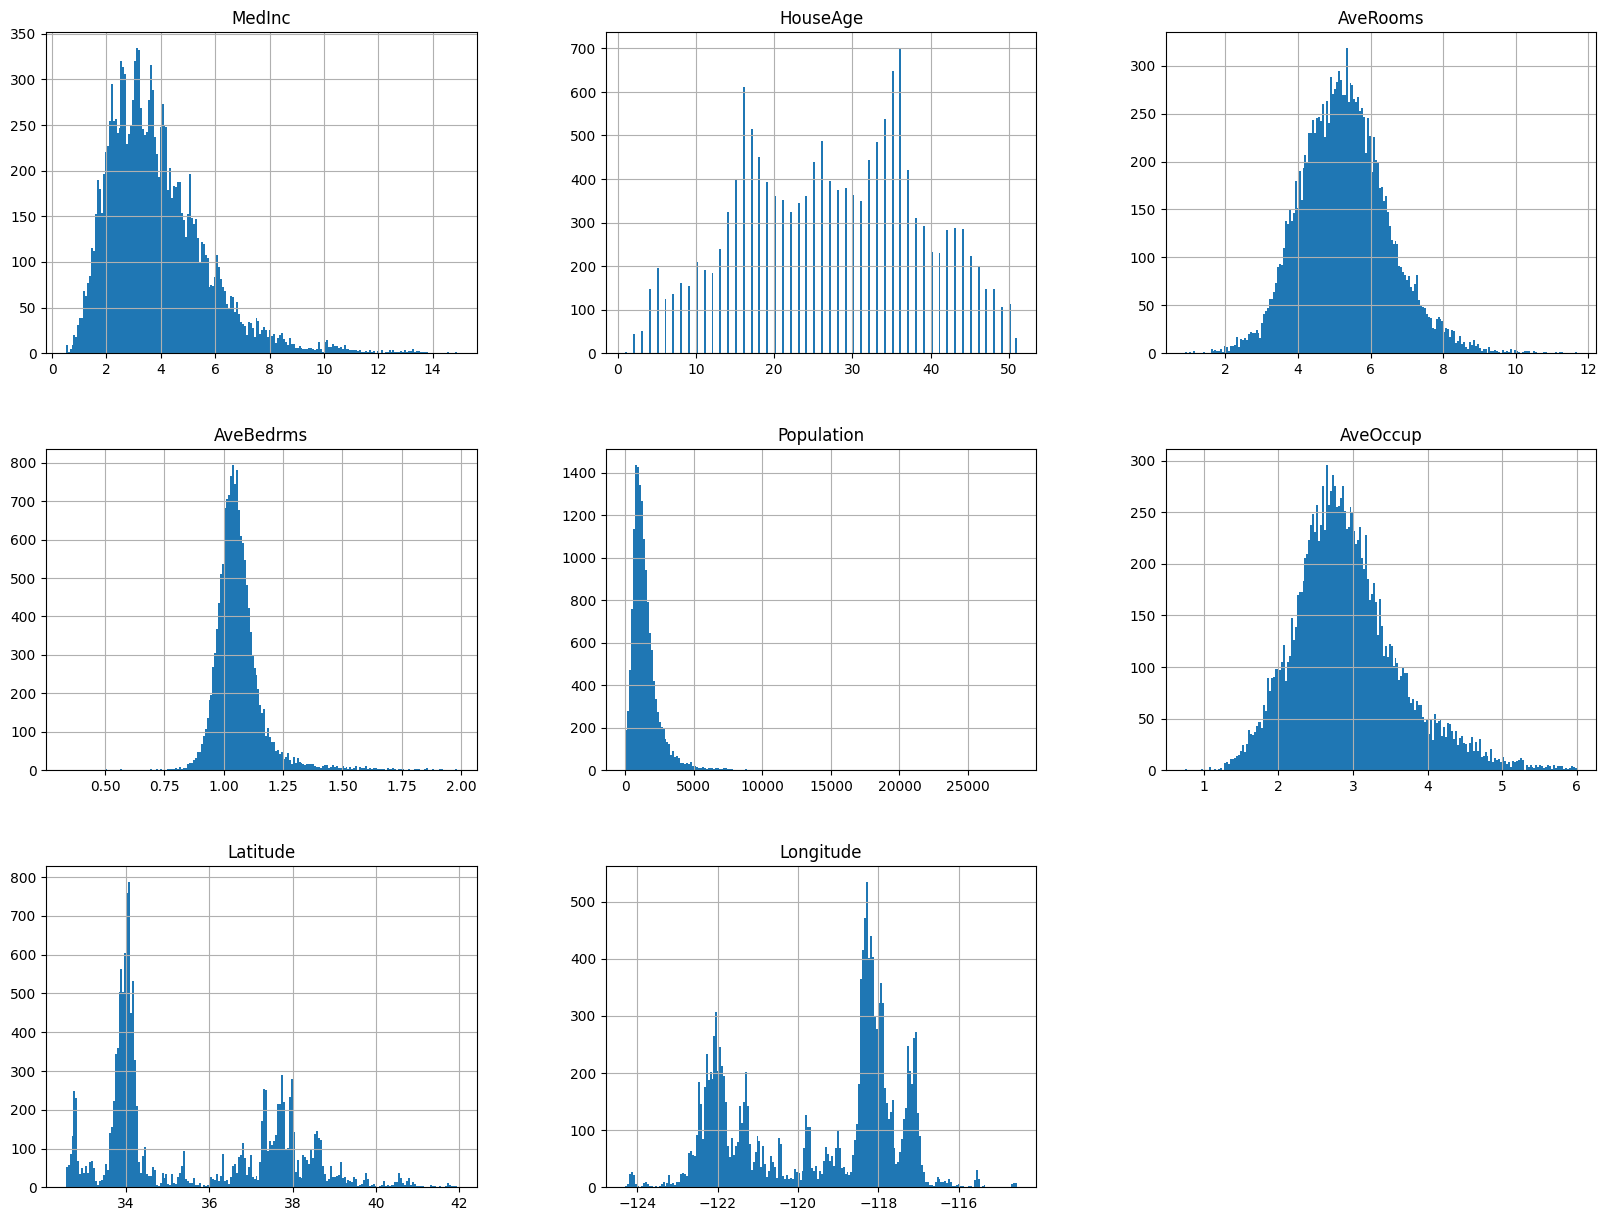

In [46]:
df.hist(bins=200, figsize=(20, 15));

In [48]:
import numpy as np

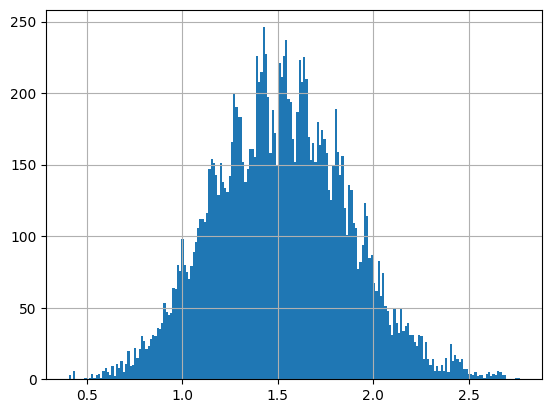

In [51]:
df['MedInc'].apply(np.log1p).hist(bins=200);

## Treinar um modelo

In [53]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train_filt, y_train_filt)

LinearRegression()

## Análise de resíduos

In [57]:
X_train_, X_valid_, y_train_, y_valid_ = train_test_split(
    X_train_filt,
    y_train_filt,
    test_size=0.2,
    random_state=42,
)

In [58]:
model.fit(X_train_, y_train_)

LinearRegression()

In [59]:
y_pred = model.predict(X_valid_)

In [62]:
from sklearn.metrics import root_mean_squared_error

rmse = root_mean_squared_error(y_valid_, y_pred)
rmse

np.float64(0.6161913397775598)

In [64]:
y_valid_.std()

np.float64(1.1092104123726128)

In [66]:
import matplotlib.pyplot as plt

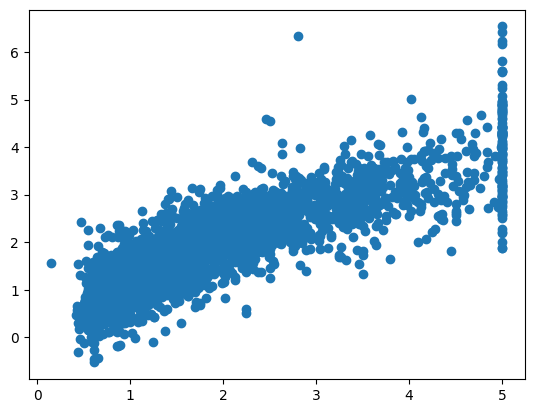

In [67]:
plt.plot(y_valid_, y_pred, 'o')